In [1]:
import torch
from torch import nn

import numpy as np
import matplotlib.pyplot as plt

# Data Create

In [2]:
# Set weight and bias
weight = 0.9
bias = 0.2

X = torch.arange(start=0.0, end=1, step=0.001).unsqueeze(dim=1)

# Get labels for y = weight * X + bias
y = weight * X + bias

train_test_split = int(0.8 * len(X))

X_train, y_train = X[:train_test_split], y[:train_test_split]
X_test, y_test = X[train_test_split:], y[train_test_split:]

### Visualize the Data

In [3]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

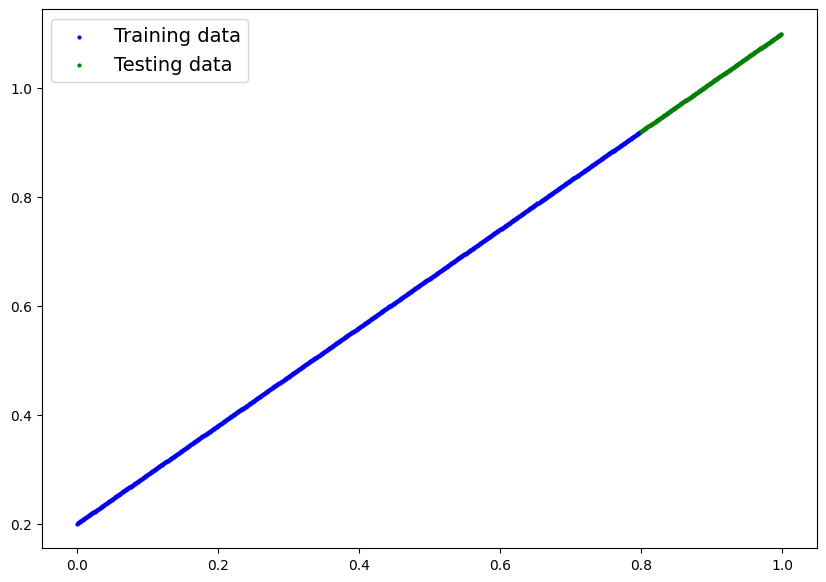

In [4]:
plot_predictions(X_train, y_train, X_test, y_test)

# Build a Model

In [5]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(X)

In [7]:
torch.manual_seed(86)
model = LinearRegressionModel()

model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7348]])),
             ('linear_layer.bias', tensor([-0.5476]))])

# Define Optimization and Loss Functions

In [8]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
loss_fn = nn.L1Loss()

model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

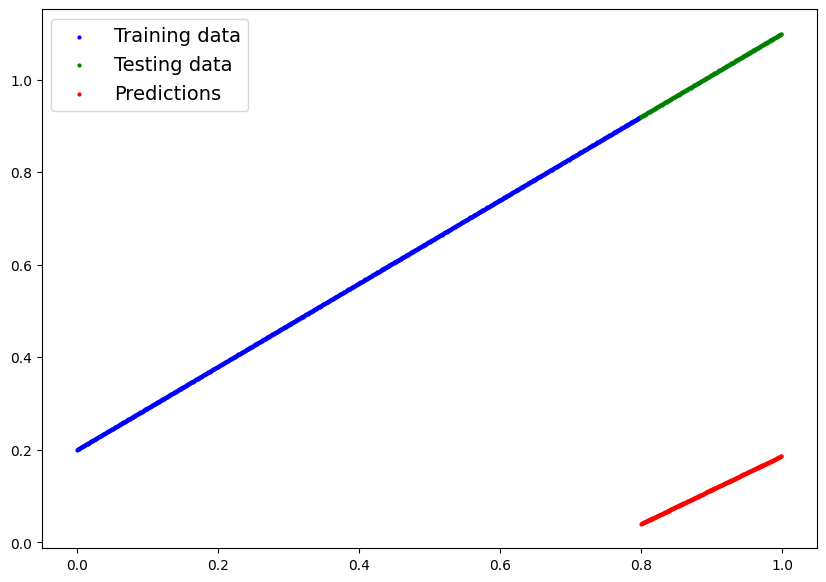

In [9]:
with torch.inference_mode():
    X_test = X_test.to(device)
    test_preds = model(X_test)

    plot_predictions(predictions=test_preds.cpu())

# Train Model

In [10]:
epochs = 50000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    model.train()

    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred, y_test)

        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.813640296459198 | Test loss: 0.8962472081184387
Epoch: 1 | Train loss: 0.8136286735534668 | Test loss: 0.8962214589118958
Epoch: 2 | Train loss: 0.8136066794395447 | Test loss: 0.896184504032135
Epoch: 3 | Train loss: 0.8135752081871033 | Test loss: 0.8961378335952759
Epoch: 4 | Train loss: 0.8135352730751038 | Test loss: 0.8960822224617004
Epoch: 5 | Train loss: 0.8134878277778625 | Test loss: 0.8960185050964355
Epoch: 6 | Train loss: 0.8134335279464722 | Test loss: 0.8959476351737976
Epoch: 7 | Train loss: 0.8133730888366699 | Test loss: 0.8958700895309448
Epoch: 8 | Train loss: 0.8133069276809692 | Test loss: 0.8957868814468384
Epoch: 9 | Train loss: 0.8132359385490417 | Test loss: 0.8956983089447021
Epoch: 10 | Train loss: 0.8131603598594666 | Test loss: 0.8956049680709839
Epoch: 11 | Train loss: 0.8130807280540466 | Test loss: 0.8955073952674866
Epoch: 12 | Train loss: 0.812997579574585 | Test loss: 0.8954060077667236
Epoch: 13 | Train loss: 0.812911152839

In [11]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9000]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2000], device='cuda:0'))])

# Test Model

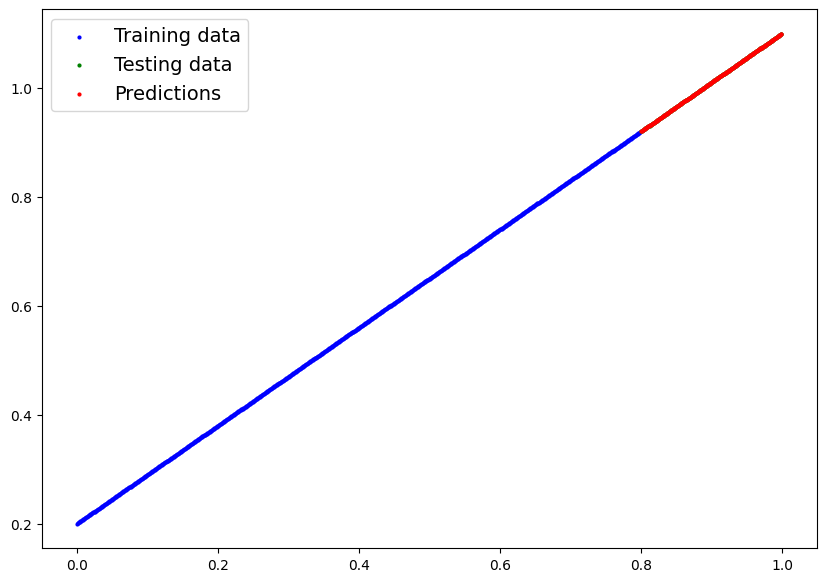

In [12]:
model.eval()

with torch.inference_mode():
    y_preds = model(X_test)

    plot_predictions(predictions=y_preds.cpu())

# Save and Load Model

### Saving and Loading Entire Model

In [13]:
torch.save(model, 'study_1_model.pt')

In [ ]:
model = torch.load('study_1_model.pt')

### Saving and Loading Parameters

In [14]:
torch.save(model.state_dict(), 'study_1_ckpt.pt')

In [ ]:
model.state_dict(torch.load('study_1_ckpt.pt'))